In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv('2025-04-avon-and-somerset-stop-and-search.csv')

#show information about the dataset
df.info()

# Count total rows in dataset
print(f"\nTotal rows: {len(df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      569 non-null    object 
 1   Date                                      569 non-null    object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  472 non-null    float64
 5   Longitude                                 472 non-null    float64
 6   Gender                                    546 non-null    object 
 7   Age range                                 511 non-null    object 
 8   Self-defined ethnicity                    469 non-null    object 
 9   Officer-defined ethnicity                 468 non-null    object 
 10  Legislation                           

In [2]:
# # Count missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# # Count empty strings per column in case they have just ""
print("\nEmpty string values per column:")
print((df == "").sum())



Missing values per column:
Type                                          0
Date                                          0
Part of a policing operation                569
Policing operation                          569
Latitude                                     97
Longitude                                    97
Gender                                       23
Age range                                    58
Self-defined ethnicity                      100
Officer-defined ethnicity                   101
Legislation                                  38
Object of search                             40
Outcome                                      44
Outcome linked to object of search          392
Removal of more than just outer clothing     60
dtype: int64

Empty string values per column:
Type                                        0
Date                                        0
Part of a policing operation                0
Policing operation                          0
Latitude              

## Data Quality Assessment

- The dataset contains 569 rows and 15 columns.
- Using `df.info()`, we found several columns with missing values, most notably:
  - 'Part of a policing operation' and 'Policing operation' are completely empty.
  - Columns like 'Latitude', 'Longitude', 'Gender', and 'Ethnicity' have partial missing values.

- We also checked for empty strings using `(df == "").sum()` and found **no empty strings** in any columns.
- This means missing data is only due to `NaN` values.
- Based on this,  will drop these columns that are fully empty and decide how to handle partial missing values in other columns during cleaning.


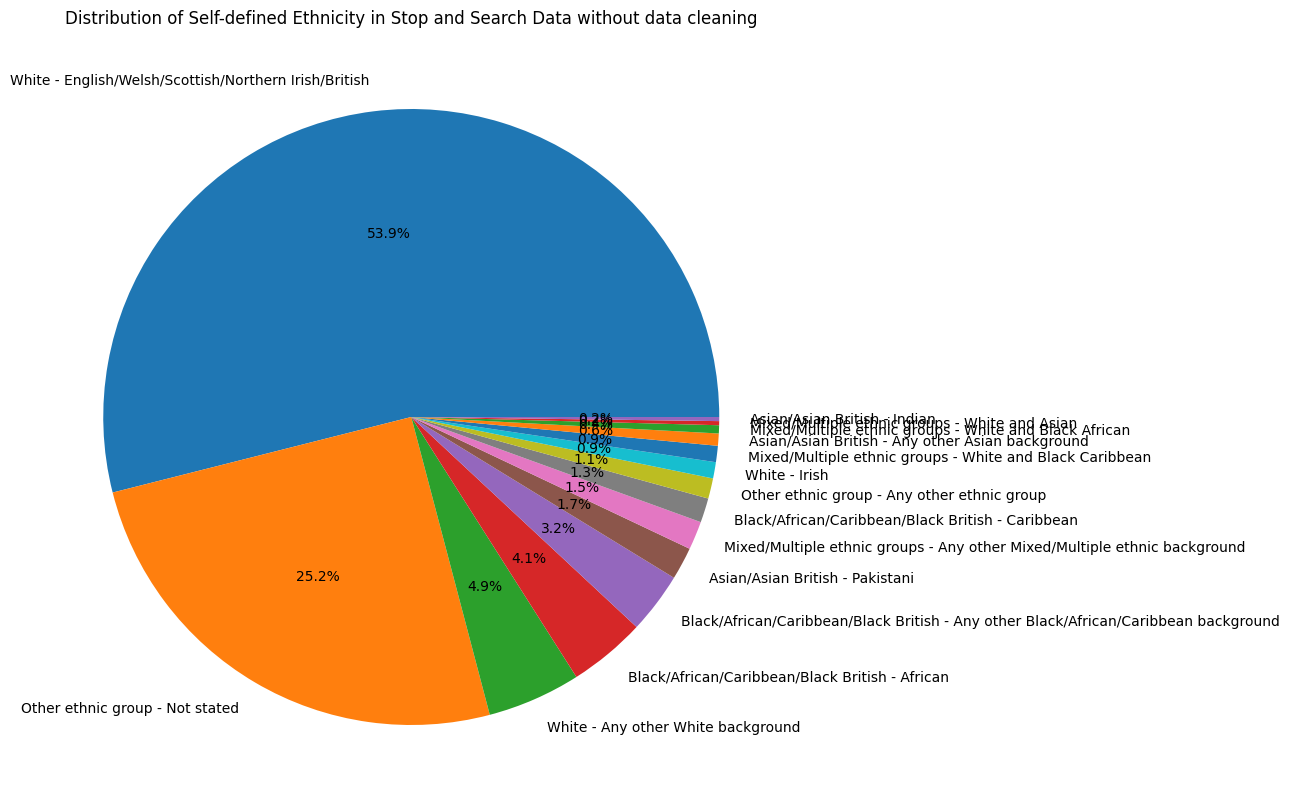

In [3]:
# display pie chart of types in Self-defined ethnicity
import matplotlib.pyplot as plt
# Count occurrences of each type in 'Self
sizes= df['Self-defined ethnicity'].value_counts()
#replace NaN with 'Unknown' for better visualization
# .plot(kind='pie', autopct='%1.1f%%')

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%',labels=sizes.index)


plt.title('Distribution of Self-defined Ethnicity in Stop and Search Data without data cleaning')
plt.show() 

# this is without the unknowns

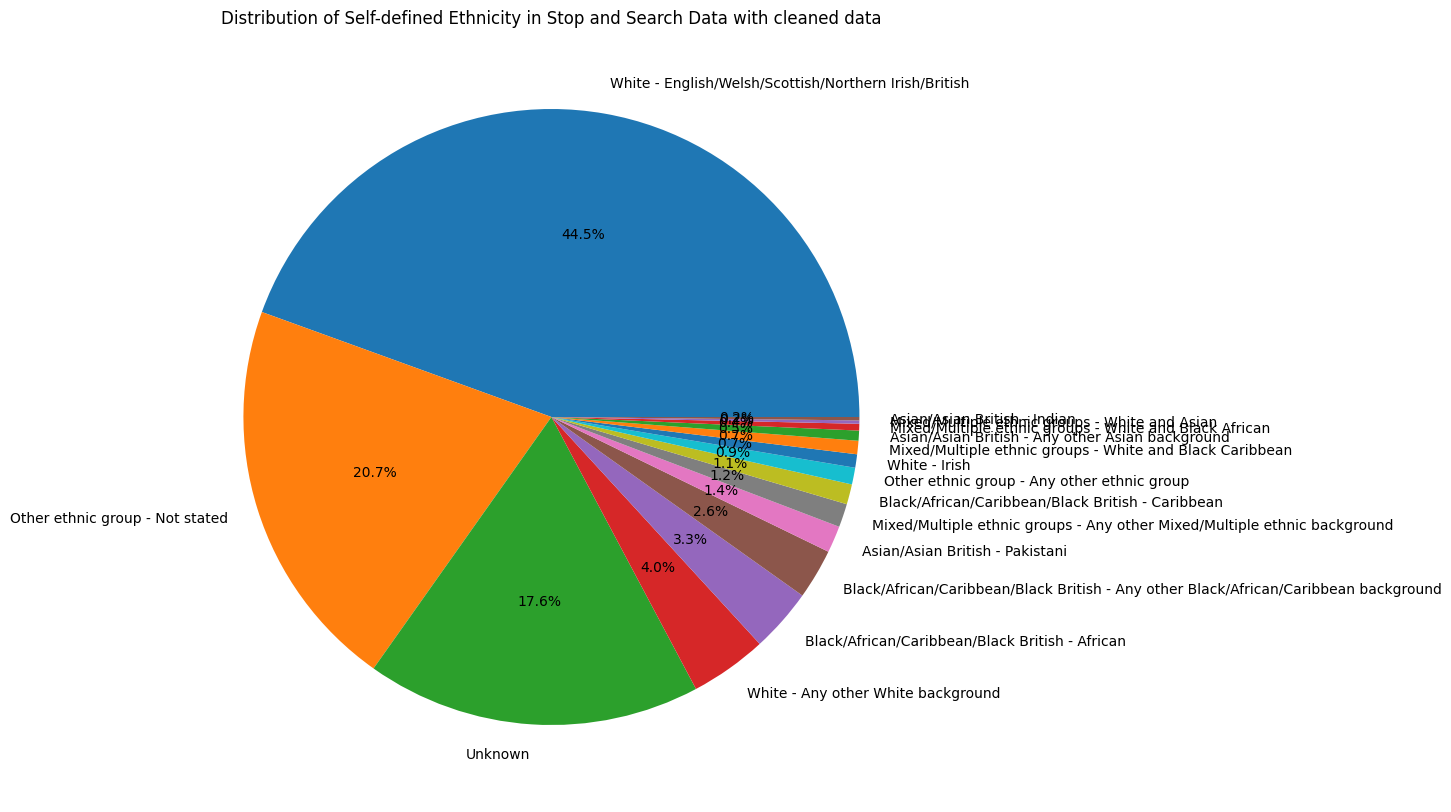

In [4]:
# display pie chart of types in Self-defined ethnicity
import matplotlib.pyplot as plt
# Count occurrences of each type in 'Self
df1 = df['Self-defined ethnicity'].fillna('Unknown')
sizes= df1.value_counts()
#replace NaN with 'Unknown' for better visualization
# .plot(kind='pie', autopct='%1.1f%%')

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%',labels=sizes.index)


plt.title('Distribution of Self-defined Ethnicity in Stop and Search Data with cleaned data')
plt.show() 


The difference in the chart percentage shows the change 

Seems that Unknown is a big chunk of the pie chart 

This will be excluded in further data analysis when saying findings !

